In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-retail/Online Retail.xlsx


#### Reading the file

In [2]:
data=pd.read_excel('/kaggle/input/online-retail/Online Retail.xlsx')

In [3]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


**This dataframe contains 8 variables that correspond to:**

* **InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* **StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* **Description:** Product (item) name. Nominal.
* **Quantity:** The quantities of each product (item) per transaction. Numeric.
* **InvoiceDate:** Invice Date and time. Numeric, the day and time when each transaction was generated.
* **UnitPrice:** Unit price. Numeric, Product price per unit in sterling.
* **CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* **Country:** Country name. Nominal, the name of the country where each customer resides.

## Initial Data Analysis 

In [4]:
data.head(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
### Description null records

1454/541909

0.002683107311375157

In [7]:
### Customer ID Nulls

135080/541909

0.249266943342886

#### Initial Inferences From Data:
* Dataset contains 541909 entries and 8 columns
* Invoice No: 1 invoice number can have multiple products purchased
* Description: ~0.3% of decriptions present are nulls
* Customer ID: ~25% of Customer ID's are nulls

In [8]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303


In [9]:
# Summary statistics for categorical variables

data.describe(include='object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
Country,541909,38,United Kingdom,495478



## Inferences

#### Quantity
* **Average Product Quantity per transaction:** 9.55
* **Negative Values:** Indicates cancelled orders.
* **High Standard Deviation (218.08):** Data is widely spread out.
* **Outliers:** Presence of outliers due to a significant gap between the 75th percentile and maximum value.

#### UnitPrice
* **Average Unit Price:** 4.61
* **Outliers:** Presence of outliers due to a significant gap between the 75th percentile and maximum value.

#### CustomerID
* **Missing Values:** 406829 missing values.

#### StockCode
* **Unique Stock Codes:** 4070 unique stock codes.

#### Description
* **Unique Descriptions:** 4223 unique descriptions.
* **Most Frequent Description:** "White hanging heart t-light holder" (2369 times).
* **Missing Values:** Few missing values.

#### Country
* **Data Coverage:** Data from 38 different countries is available. 

## Data Cleaning and Transformation

In [10]:
### Checking for nulls

missing_data=data.isna().sum()
missing_per=(missing_data[missing_data>0]/data.shape[0])*100
missing_data

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
round(missing_per,2)

Description     0.27
CustomerID     24.93
dtype: float64

In [12]:
### Checking if for each stock code - only 1 description exists or not

data_stockcodes=data.groupby('StockCode')['Description'].unique()
data_stockcodes

StockCode
10002                          [INFLATABLE POLITICAL GLOBE , nan]
10080                      [GROOVY CACTUS INFLATABLE, nan, check]
10120                                              [DOGGY RUBBER]
10125                                   [MINI FUNKY DESIGN TAPES]
10133                     [COLOURING PENCILS BROWN TUBE, damaged]
                                      ...                        
gift_0001_20    [Dotcomgiftshop Gift Voucher £20.00, to push o...
gift_0001_30            [Dotcomgiftshop Gift Voucher £30.00, nan]
gift_0001_40                 [Dotcomgiftshop Gift Voucher £40.00]
gift_0001_50                 [Dotcomgiftshop Gift Voucher £50.00]
m                                                        [Manual]
Name: Description, Length: 4070, dtype: object


## Inferences

#### Customer ID
* ~ 25% of the customer ID's are missing
* Imputing data won't help as clustering is based on customer behavior and preferences. Accurate data is required
* Removing them might be a good choice

#### Description
* 0.27% descriptions are missing
* Each stock code does not corresspond to a unique description
* Removing this column might be a good choice as well

In [13]:
### Removing rows with missing values in 'CustomerID' and 'Description' columns

data = data.dropna(subset=['CustomerID', 'Description'])
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [14]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## Handling Duplicate Values

In [15]:
### Checking for duplicate entries

data.duplicated().sum()

5225

In [16]:
### Deleting the duplicate entries

data.drop_duplicates(inplace = True)

/tmp/ipykernel_78/2637226286.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace = True)


In [17]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


**Ideas for Segmentation**
* Customer demographic(Country)
* Frequency of Monthly purchase
* Spend Amount
* RFM Analysis can also be explored
* Recommendation system can be developed

## Invoice number column has 'C' prefixing some numbers. These signify transactions that are cancelled. 

In [18]:
## Invoice number column has prefixed alphabets

import pandas as pd
import re

# Create a regular expression pattern
pattern = r'^[a-zA-Z]+\d+$|\d+[a-zA-Z]+$'

# Filter rows based on the pattern
cancelled_df = data[data['InvoiceNo'].str.match(pattern) == True]  # Convert to boolean

cancelled_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [19]:
cancelled_df[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,8872.000000,8872.000000
mean,-30.774910,18.899512
std,1172.249902,445.190864
min,-80995.000000,0.010000
25%,-6.000000,1.450000
50%,-2.000000,2.950000
75%,-1.000000,4.950000
max,-1.000000,38970.000000



## Inferences

* Unit prices have a high variance factor. 
* Keeping these records might help in clustering as this would efficiently capture the segment of customers that cancel their orders often
* Recommendation system will not recommend these products



In [20]:
### Creating a new column to show transaction status

data['Transaction_Status'] = np.where(data['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')
data

/tmp/ipykernel_78/504319320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Transaction_Status'] = np.where(data['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Completed
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Completed
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed


In [21]:
data[data['Transaction_Status']=="Cancelled"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,Cancelled
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,Cancelled
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,Cancelled
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,Cancelled
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,Cancelled
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,Cancelled
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,Cancelled
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,Cancelled
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,Cancelled


In [25]:
### Percentage of Cancelled Transactions

cancelled_percent=round(((data['Transaction_Status'] == 'Cancelled').sum()/data.shape[0])*100,2)
print("The percentage of cancelled transactions is: ",cancelled_percent,"%")

The percentage of cancelled transactions is:  2.21 %


## Analysing the Stockcode Column 

In [26]:
## Unique Stock Codes
stock_codes_distinct=data['StockCode'].nunique()
stock_codes_distinct

3684

In [27]:
data['StockCode'].value_counts().head(10)

StockCode
85123A    2065
22423     1894
85099B    1659
47566     1409
84879     1405
20725     1346
22720     1224
POST      1196
22197     1110
23203     1108
Name: count, dtype: int64

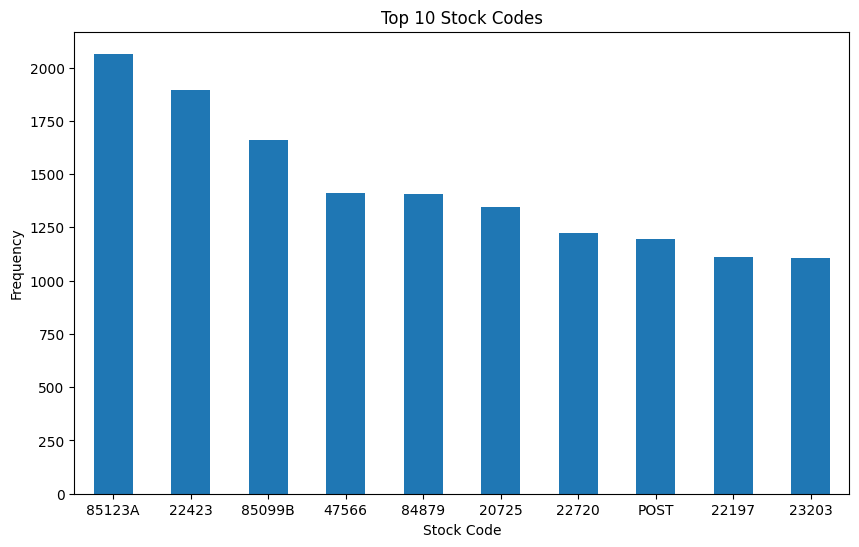

In [28]:
import matplotlib.pyplot as plt

# Assuming data is your DataFrame

top_stock_codes = data['StockCode'].value_counts().head(10)

# Create a bar graph
top_stock_codes.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Stock Codes')
plt.xlabel('Stock Code')
plt.ylabel('Frequency')
plt.xticks(rotation=0, fontsize=10)
plt.show()



## Inferences

* Not all stock codes are numeric 
* Need to dive further to understand how many non numeric stock codes exist


In [29]:
data.dtypes

InvoiceNo                     object
StockCode                     object
Description                   object
Quantity                       int64
InvoiceDate           datetime64[ns]
UnitPrice                    float64
CustomerID                   float64
Country                       object
Transaction_Status            object
dtype: object

In [30]:
### Finding the number of numeric characters in each unique stock code

unique_stock_codes = data['StockCode'].unique()
numeric_char_counts_in_unique_codes = pd.Series(unique_stock_codes).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()
numeric_char_counts_in_unique_codes

5    3676
0       7
1       1
Name: count, dtype: int64

In [31]:
unique_stock_codes

array(['85123A', 71053, '84406B', ..., '90214Z', 90089, 23843],
      dtype=object)

In [32]:
# Finding and printing the stock codes with 0 and 1 numeric characters
anomalous_stock_codes = [code for code in unique_stock_codes if sum(c.isdigit() for c in str(code)) in (0, 1)]

# Printing each stock code on a new line
print("Anomalous stock codes:")
for code in anomalous_stock_codes:
    print(code)

Anomalous stock codes:
POST
D
C2
M
BANK CHARGES
PADS
DOT
CRUK


In [33]:
### Pecentage of anomalous records present in data

anomalous_stock_codes

['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT', 'CRUK']

In [34]:
### Filter the DataFrame for anomalous stock codes
anomalous_data = data[data['StockCode'].isin(anomalous_stock_codes)]

### Calculate the sum of records
total_anomalous_records = len(anomalous_data)

### Getting percentage of anomalous codes in the data
per_anomalous_codes=round((total_anomalous_records/data.shape[0])*100,2)

print("Percentage of anomalous codes in the dataframe:", per_anomalous_codes,"%")

Percentage of anomalous codes in the dataframe: 0.48 %


## Inferences

* Majority 5 digit codes exist
* 7 anomalous codes only exist in 0.48% of the dataset and hence can be removed


In [35]:
anomalous_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.0,France,Completed
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,Cancelled
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791.0,Netherlands,Completed
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.00,12662.0,Germany,Completed
1423,536540,C2,CARRIAGE,1,2010-12-01 14:05:00,50.00,14911.0,EIRE,Completed
...,...,...,...,...,...,...,...,...,...
541216,581494,POST,POSTAGE,2,2011-12-09 10:13:00,18.00,12518.0,Germany,Completed
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,Cancelled
541730,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.00,12662.0,Germany,Completed
541767,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.00,12526.0,Germany,Completed


In [36]:
### Filtering the DataFrame for normal stock codes
data = data[~data['StockCode'].isin(anomalous_stock_codes)]
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Completed
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Completed
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed


## Analysing the Description Column

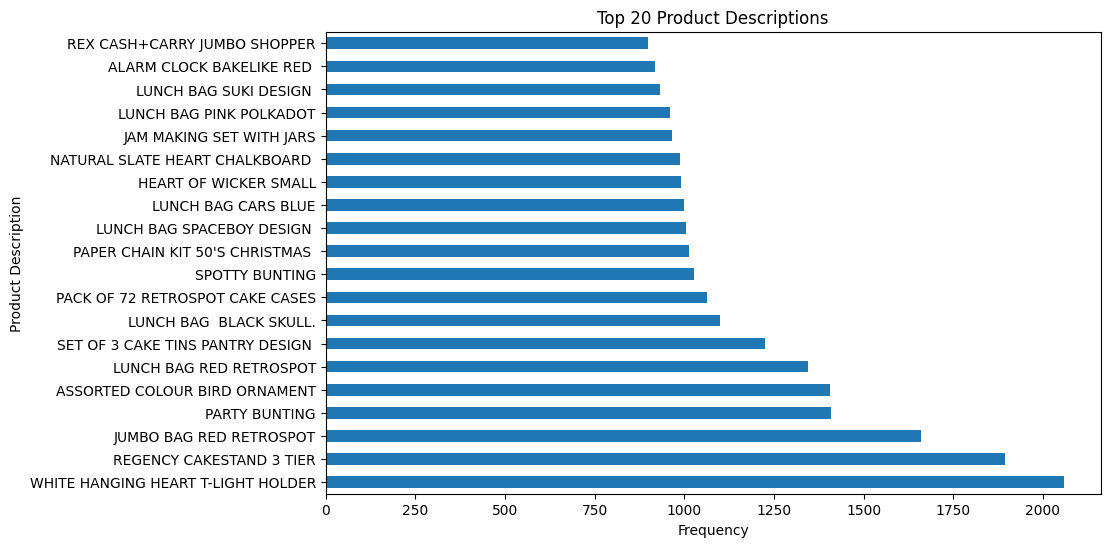

In [37]:
### Top 20 selling products

top_product_desc = data['Description'].value_counts().head(20).sort_values(ascending=False)

# Create a horizontal bar graph
top_product_desc.plot(kind='barh', figsize=(10, 6))
plt.title('Top 20 Product Descriptions')
plt.xlabel('Frequency')
plt.ylabel('Product Description')
plt.show()


In [38]:
### Find unique descriptions containing lowercase characters

lowercase_descriptions = data['Description'].unique()
lowercase_descriptions = [desc for desc in lowercase_descriptions if any(char.islower() for char in desc)]

for desc in lowercase_descriptions:
    print(desc)

BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
3 TRADITIONAl BISCUIT CUTTERS  SET
NUMBER TILE COTTAGE GARDEN No
FOLK ART GREETING CARD,pack/12
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
NUMBER TILE VINTAGE FONT No 
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 60x40cm
FLOWERS HANDBAG blue and orange
Next Day Carriage
THE KING GIFT BAG 25x24x12cm
High Resolution Image


In [39]:
### Checking for product descriptions containing the following keywords: "Next Day Carriage" OR "High Resolution Image"

filtered_data = data[(data['Description'] == 'Next Day Carriage') | (data['Description'] == 'High Resolution Image')]
filtered_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status
205748,554835,23444,Next Day Carriage,1,2011-05-26 16:11:00,15.0,15241.0,United Kingdom,Completed
209588,555251,23444,Next Day Carriage,1,2011-06-01 15:12:00,15.0,13062.0,United Kingdom,Completed
210691,555312,23444,Next Day Carriage,1,2011-06-02 10:39:00,15.0,16484.0,United Kingdom,Completed
211341,555367,23444,Next Day Carriage,1,2011-06-02 14:28:00,15.0,17900.0,United Kingdom,Completed
218011,555948,23444,Next Day Carriage,1,2011-06-08 10:49:00,30.0,13752.0,United Kingdom,Completed
...,...,...,...,...,...,...,...,...,...
525425,580622,23444,Next Day Carriage,1,2011-12-05 12:09:00,15.0,17006.0,United Kingdom,Completed
525438,580630,23444,Next Day Carriage,1,2011-12-05 12:11:00,15.0,12913.0,United Kingdom,Completed
534091,581132,23444,Next Day Carriage,1,2011-12-07 12:55:00,15.0,17590.0,United Kingdom,Completed
536863,581221,23444,Next Day Carriage,1,2011-12-08 09:40:00,15.0,17856.0,United Kingdom,Completed


In [40]:
### Removing the above records as these terms don't make sense for product descriptions

percent_anom_pd=round((filtered_data.shape[0]/data.shape[0])*100,2)
print("Percentage of instances with 'Next Day Carriage' or 'High resolution Image' are",percent_anom_pd,"%")

Percentage of instances with 'Next Day Carriage' or 'High resolution Image' are 0.02 %


In [41]:
filtered_data['Description'].unique()

array(['Next Day Carriage', 'High Resolution Image'], dtype=object)

In [42]:
### Removing the above records as these terms don't make sense for product descriptions

data = data[~data['Description'].isin(filtered_data['Description'].unique())]
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Completed
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Completed
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed


## Analysing the Unit Price Column

In [43]:
data['UnitPrice'].describe()

count    399606.000000
mean          2.904957
std           4.448796
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

In [44]:
data[data['UnitPrice']==0].describe()[['Quantity']]

,Quantity
count,33.000000
mean,420.515152
min,1.000000
25%,2.000000
50%,11.000000
75%,36.000000
max,12540.000000
std,2176.713608


## Inferences

* Unit Price=0 in 33 records (Might be an error)
* Deep dive: Qty is 12540 where Unit Price is 0. Doesn't seem right
* Removing these record should be a better approach to remove noise


In [45]:
### Removing these records from the data

data=data[data['UnitPrice']!=0]
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Completed
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Completed
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed


In [46]:
### Resetting Index

data.reset_index(drop=True,inplace=True)

In [47]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed
...,...,...,...,...,...,...,...,...,...
399568,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Completed
399569,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Completed
399570,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed
399571,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed


## Feature Engineering - RFM Features

### Recency (Days Since Last Purchase)

In [48]:
data.dtypes

InvoiceNo                     object
StockCode                     object
Description                   object
Quantity                       int64
InvoiceDate           datetime64[ns]
UnitPrice                    float64
CustomerID                   float64
Country                       object
Transaction_Status            object
dtype: object

In [49]:
### Extracting date

data['InvoiceDay'] = data['InvoiceDate'].dt.date

/tmp/ipykernel_78/2412728416.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['InvoiceDay'] = data['InvoiceDate'].dt.date


In [50]:
### Creating a new dataframe for features at customer ID level

customer_data=data.groupby('CustomerID')['InvoiceDay'].max().reset_index()
customer_data

,CustomerID,InvoiceDay
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02
...,...,...
4357,18280.0,2011-03-07
4358,18281.0,2011-06-12
4359,18282.0,2011-12-02
4360,18283.0,2011-12-06


In [51]:
### Extracting the most recent date of purchase and subtracting it 
most_recent_dateofpurchase=data['InvoiceDay'].max()

### Converting them to same date format
customer_data['InvoiceDay'] = pd.to_datetime(customer_data['InvoiceDay'])
most_recent_dateofpurchase = pd.to_datetime(most_recent_dateofpurchase)

### Calculating the Recency of each customer
customer_data['Days_Since_Last_Purchase'] = (most_recent_dateofpurchase - customer_data['InvoiceDay']).dt.days

customer_data

,CustomerID,InvoiceDay,Days_Since_Last_Purchase
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310
...,...,...,...
4357,18280.0,2011-03-07,277
4358,18281.0,2011-06-12,180
4359,18282.0,2011-12-02,7
4360,18283.0,2011-12-06,3


In [52]:
### Removing Invoice Day

customer_data.drop(columns=['InvoiceDay'], inplace=True)
customer_data

,CustomerID,Days_Since_Last_Purchase
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310
...,...,...
4357,18280.0,277
4358,18281.0,180
4359,18282.0,7
4360,18283.0,3


## Frequency (Total Transaction And Total Products Purchased)

In [53]:
data['CustomerID'].nunique()

4362

In [54]:
### Total Transaction per customer

transactions_df=data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
transactions_df.rename(columns={'InvoiceNo': 'Total_Transactions'}, inplace=True)
transactions_df

,CustomerID,Total_Transactions
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4357,18280.0,1
4358,18281.0,1
4359,18282.0,3
4360,18283.0,16


In [55]:
### Total Products purchased per customer

products_purchased_df=data.groupby('CustomerID')['Quantity'].sum().reset_index()
products_purchased_df.rename(columns={'Quantity': 'Total_Products_Purchased'}, inplace=True)
products_purchased_df

,CustomerID,Total_Products_Purchased
0,12346.0,0
1,12347.0,2458
2,12348.0,2332
3,12349.0,630
4,12350.0,196
...,...,...
4357,18280.0,45
4358,18281.0,54
4359,18282.0,98
4360,18283.0,1355


In [56]:
### Merge the new features into the customer_data dataframe

customer_data = pd.merge(customer_data, transactions_df, on='CustomerID')
customer_data = pd.merge(customer_data, products_purchased_df, on='CustomerID')
customer_data

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased
0,12346.0,325,2,0
1,12347.0,2,7,2458
2,12348.0,75,4,2332
3,12349.0,18,1,630
4,12350.0,310,1,196
...,...,...,...,...
4357,18280.0,277,1,45
4358,18281.0,180,1,54
4359,18282.0,7,3,98
4360,18283.0,3,16,1355


## Monetary (Total Spend, Average Order Value)

In [57]:
### Total Spend per customer

data['TotalSpend']=data['UnitPrice']*data['Quantity']
total_spend_df=data.groupby('CustomerID')['TotalSpend'].sum().reset_index()
total_spend_df

/tmp/ipykernel_78/3606228134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TotalSpend']=data['UnitPrice']*data['Quantity']


,CustomerID,TotalSpend
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1437.24
3,12349.0,1457.55
4,12350.0,294.40
...,...,...
4357,18280.0,180.60
4358,18281.0,80.82
4359,18282.0,176.60
4360,18283.0,2039.58


In [58]:
### Merging the new features

customer_data = pd.merge(customer_data, total_spend_df, on='CustomerID')

In [59]:
customer_data

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,TotalSpend
0,12346.0,325,2,0,0.00
1,12347.0,2,7,2458,4310.00
2,12348.0,75,4,2332,1437.24
3,12349.0,18,1,630,1457.55
4,12350.0,310,1,196,294.40
...,...,...,...,...,...
4357,18280.0,277,1,45,180.60
4358,18281.0,180,1,54,80.82
4359,18282.0,7,3,98,176.60
4360,18283.0,3,16,1355,2039.58


In [60]:
### AOV per customer

customer_data['AOV']=customer_data['TotalSpend']/customer_data['Total_Transactions']
customer_data

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,TotalSpend,AOV
0,12346.0,325,2,0,0.00,0.000000
1,12347.0,2,7,2458,4310.00,615.714286
2,12348.0,75,4,2332,1437.24,359.310000
3,12349.0,18,1,630,1457.55,1457.550000
4,12350.0,310,1,196,294.40,294.400000
...,...,...,...,...,...,...
4357,18280.0,277,1,45,180.60,180.600000
4358,18281.0,180,1,54,80.82,80.820000
4359,18282.0,7,3,98,176.60,58.866667
4360,18283.0,3,16,1355,2039.58,127.473750


## Feature Engineering - Product Diversity(Unique Products Purchased)

In [62]:
# Calculate the number of unique products purchased by each customer
unique_products_purchased = data.groupby('CustomerID')['StockCode'].nunique().reset_index()
unique_products_purchased.rename(columns={'StockCode': 'Unique_Products_Purchased'}, inplace=True)

# Merge the new feature into the customer_data dataframe
customer_data = pd.merge(customer_data, unique_products_purchased, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,TotalSpend,AOV,Unique_Products_Purchased
0,12346.0,325,2,0,0.00,0.000000,1
1,12347.0,2,7,2458,4310.00,615.714286,103
2,12348.0,75,4,2332,1437.24,359.310000,21
3,12349.0,18,1,630,1457.55,1457.550000,72
4,12350.0,310,1,196,294.40,294.400000,16


## Feature Engineering - Behavioral Features

### Average Days Between Purchase

In [63]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status,InvoiceDay,TotalSpend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34
...,...,...,...,...,...,...,...,...,...,...,...
399568,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Completed,2011-12-09,10.20
399569,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Completed,2011-12-09,12.60
399570,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,2011-12-09,16.60
399571,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,2011-12-09,16.60


In [64]:
data.dtypes

InvoiceNo                     object
StockCode                     object
Description                   object
Quantity                       int64
InvoiceDate           datetime64[ns]
UnitPrice                    float64
CustomerID                   float64
Country                       object
Transaction_Status            object
InvoiceDay                    object
TotalSpend                   float64
dtype: object

In [65]:
### Extract day of week and hour from InvoiceDate

data['Day_Of_Week'] = data['InvoiceDate'].dt.dayofweek
data['Hour'] = data['InvoiceDate'].dt.hour

/tmp/ipykernel_78/837585950.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Day_Of_Week'] = data['InvoiceDate'].dt.dayofweek
/tmp/ipykernel_78/837585950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Hour'] = data['InvoiceDate'].dt.hour


In [66]:
### Calculating the average number of days between consecutive purchases

days_between_purchases = data.groupby('CustomerID')['InvoiceDay'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))
average_days_between_purchases = days_between_purchases.groupby('CustomerID').mean().reset_index()
average_days_between_purchases.rename(columns={'InvoiceDay': 'Average_Days_Between_Purchases'}, inplace=True)
customer_data = pd.merge(customer_data, average_days_between_purchases, on='CustomerID')

/tmp/ipykernel_78/3833788009.py:3: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  days_between_purchases = data.groupby('CustomerID')['InvoiceDay'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))


### Favourite Shopping Day

In [67]:
### Find the favorite shopping day of the week

favorite_shopping_day = data.groupby(['CustomerID', 'Day_Of_Week']).size().reset_index(name='Count')
favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Day_Of_Week']]
customer_data = pd.merge(customer_data, favorite_shopping_day, on='CustomerID')


### Favourite Shopping Hour

In [68]:

# Find the favorite shopping hour of the day
favorite_shopping_hour = data.groupby(['CustomerID', 'Hour']).size().reset_index(name='Count')
favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Hour']]
customer_data = pd.merge(customer_data, favorite_shopping_hour, on='CustomerID')

In [70]:
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,TotalSpend,AOV,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16


## Feature Engineering - Geographic Features(Country)

In [71]:
data['Country'].value_counts(normalize=True).head()

Country
United Kingdom    0.890971
Germany           0.022722
France            0.020402
EIRE              0.018440
Spain             0.006162
Name: proportion, dtype: float64

## Inference

* UK seems to have the highest number of records
* Creating a dominant country for each customer would be a good idea to indicate if a customer makes maximum number of transactions in UK or not

In [72]:
### Number of transactions per country for each customer

customer_country = data.groupby(['CustomerID', 'Country']).size().reset_index(name='Number_of_Transactions')
customer_country

,CustomerID,Country,Number_of_Transactions
0,12346.0,United Kingdom,2
1,12347.0,Iceland,182
2,12348.0,Finland,27
3,12349.0,Italy,72
4,12350.0,Norway,16
...,...,...,...
4365,18280.0,United Kingdom,10
4366,18281.0,United Kingdom,7
4367,18282.0,United Kingdom,13
4368,18283.0,United Kingdom,719


In [73]:
### Checking for duplicate entries

customer_country[customer_country['CustomerID'].duplicated(keep=False)]

,CustomerID,Country,Number_of_Transactions
20,12370.0,Austria,7
21,12370.0,Cyprus,158
39,12394.0,Belgium,20
40,12394.0,Denmark,5
58,12417.0,Belgium,167
59,12417.0,Spain,22
63,12422.0,Australia,21
64,12422.0,Switzerland,17
71,12429.0,Austria,20
72,12429.0,Denmark,74


In [74]:
### Country with the maximum number of transactions for each customer 

customer_main_country = customer_country.sort_values('Number_of_Transactions', ascending=False).drop_duplicates('CustomerID')
customer_main_country

,CustomerID,Country,Number_of_Transactions
4041,17841.0,United Kingdom,7800
1899,14911.0,EIRE,5806
1304,14096.0,United Kingdom,5095
336,12748.0,United Kingdom,4440
1678,14606.0,United Kingdom,2755
...,...,...,...
2527,15753.0,United Kingdom,1
647,13185.0,United Kingdom,1
650,13188.0,United Kingdom,1
1117,13841.0,United Kingdom,1


In [75]:
customer_main_country[customer_main_country['CustomerID']==12370]

,CustomerID,Country,Number_of_Transactions
21,12370.0,Cyprus,158


In [76]:
### Create a binary column indicating whether the customer is from the UK or not

customer_main_country['Is_UK'] = customer_main_country['Country'].apply(lambda x: 1 if x == 'United Kingdom' else 0)
customer_main_country

,CustomerID,Country,Number_of_Transactions,Is_UK
4041,17841.0,United Kingdom,7800,1
1899,14911.0,EIRE,5806,0
1304,14096.0,United Kingdom,5095,1
336,12748.0,United Kingdom,4440,1
1678,14606.0,United Kingdom,2755,1
...,...,...,...,...
2527,15753.0,United Kingdom,1,1
647,13185.0,United Kingdom,1,1
650,13188.0,United Kingdom,1,1
1117,13841.0,United Kingdom,1,1


In [77]:
### Merge this data with our customer_data dataframe

customer_data = pd.merge(customer_data, customer_main_country[['CustomerID', 'Is_UK']], on='CustomerID', how='left')

In [78]:
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,TotalSpend,AOV,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16,0


In [79]:
customer_data['Is_UK'].value_counts()

Is_UK
1    3866
0     416
Name: count, dtype: int64

## Feature Engineering - Cancellations 

### Cancellation Frequency

In [80]:
customer_data

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,TotalSpend,AOV,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16,0
...,...,...,...,...,...,...,...,...,...,...,...
4277,18280.0,277,1,45,180.60,180.600000,10,0.000000,0,9,1
4278,18281.0,180,1,54,80.82,80.820000,7,0.000000,6,10,1
4279,18282.0,7,3,98,176.60,58.866667,12,9.916667,4,13,1
4280,18283.0,3,16,1355,2039.58,127.473750,262,0.465181,3,14,1


In [81]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status,InvoiceDay,TotalSpend,Day_Of_Week,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,2010-12-01,15.30,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,2010-12-01,22.00,2,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,2,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399568,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Completed,2011-12-09,10.20,4,12
399569,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Completed,2011-12-09,12.60,4,12
399570,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,2011-12-09,16.60,4,12
399571,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,2011-12-09,16.60,4,12


In [82]:
### Getting the cancelled transactions per customer

Cancelled_transactions=data[data['Transaction_Status']=="Cancelled"]
Cancelled_transactions.head(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status,InvoiceDay,TotalSpend,Day_Of_Week,Hour
152,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,Cancelled,2010-12-01,-4.65,2,9
233,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,Cancelled,2010-12-01,-19.80,2,10
234,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,Cancelled,2010-12-01,-6.96,2,10
235,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,Cancelled,2010-12-01,-6.96,2,10


In [83]:
### Creating a column for the cancellation frequency

cancelled_frequency=Cancelled_transactions.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
cancelled_frequency

,CustomerID,InvoiceNo
0,12346.0,1
1,12352.0,1
2,12359.0,2
3,12362.0,3
4,12375.0,1
...,...,...
1529,18272.0,1
1530,18274.0,1
1531,18276.0,2
1532,18277.0,1


In [84]:
### Renaming the column 

cancelled_frequency.rename(columns={'InvoiceNo': 'Cancellation_Frequency'}, inplace=True)

In [85]:
### Merging the Cancellation Frequency data into the customer_data dataframe

customer_data = pd.merge(customer_data, cancelled_frequency, on='CustomerID', how='left')
customer_data.head(4)

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,TotalSpend,AOV,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1,1.0
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0,NaN
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0,NaN
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0,NaN


In [86]:
### Replace NaN values with 0

customer_data['Cancellation_Frequency'].fillna(0, inplace=True)
customer_data.head(4)

/tmp/ipykernel_78/821809886.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_data['Cancellation_Frequency'].fillna(0, inplace=True)


,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,TotalSpend,AOV,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1,1.0
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0,0.0
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0,0.0
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0,0.0


### Cancellation Rate

In [87]:
### Calculating the Cancellation Rate

customer_data['Cancellation_Rate'] = customer_data['Cancellation_Frequency'] / customer_data['Total_Transactions']
customer_data.head(4)

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,TotalSpend,AOV,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1,1.0,0.5
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0,0.0,0.0
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0,0.0,0.0
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0,0.0,0.0


## Feature Engineering - Seasonality 

## Monthly Spending Mean

In [88]:
# Extract month and year from InvoiceDate
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month

/tmp/ipykernel_78/4062524770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['InvoiceDate'].dt.year
/tmp/ipykernel_78/4062524770.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = data['InvoiceDate'].dt.month


In [89]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status,InvoiceDay,TotalSpend,Day_Of_Week,Hour,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,2010-12-01,15.30,2,8,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,2,8,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,2010-12-01,22.00,2,8,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,2,8,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,2,8,2010,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399568,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Completed,2011-12-09,10.20,4,12,2011,12
399569,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Completed,2011-12-09,12.60,4,12,2011,12
399570,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,2011-12-09,16.60,4,12,2011,12
399571,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,2011-12-09,16.60,4,12,2011,12


In [95]:
monthly_spend=data.groupby(['CustomerID','Year','Month'])['TotalSpend'].sum().reset_index()
monthly_spend

,CustomerID,Year,Month,TotalSpend
0,12346.0,2011,1,0.00
1,12347.0,2010,12,711.79
2,12347.0,2011,1,475.39
3,12347.0,2011,4,636.25
4,12347.0,2011,6,382.52
...,...,...,...,...
13616,18283.0,2011,10,112.99
13617,18283.0,2011,11,637.71
13618,18283.0,2011,12,208.00
13619,18287.0,2011,5,765.28


In [114]:
### Calculating mean 

monthly_spend_mean=monthly_spend.groupby(['CustomerID'])['TotalSpend'].agg(['mean']).reset_index()
monthly_spend_mean.rename(columns={'mean':'Monthly_Spending_Mean'},inplace=True)
monthly_spend_mean

,CustomerID,Monthly_Spending_Mean
0,12346.0,0.000000
1,12347.0,615.714286
2,12348.0,359.310000
3,12349.0,1457.550000
4,12350.0,294.400000
...,...,...
4357,18280.0,180.600000
4358,18281.0,80.820000
4359,18282.0,88.300000
4360,18283.0,203.958000


### Monthly Spending Standard Deviation

In [115]:
### Calculating stdev 

monthly_spend_sd=monthly_spend.groupby(['CustomerID'])['TotalSpend'].agg(['std']).reset_index()
monthly_spend_sd.rename(columns={'std':'Monthly_Spending_SD'},inplace=True)
monthly_spend_sd

,CustomerID,Monthly_Spending_SD
0,12346.0,NaN
1,12347.0,341.070789
2,12348.0,203.875689
3,12349.0,NaN
4,12350.0,NaN
...,...,...
4357,18280.0,NaN
4358,18281.0,NaN
4359,18282.0,14.792674
4360,18283.0,165.798738


In [116]:
### Replace NaN values with 0

monthly_spend_sd['Monthly_Spending_SD'].fillna(0, inplace=True)
monthly_spend_sd.head(4)

/tmp/ipykernel_78/1431898142.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  monthly_spend_sd['Monthly_Spending_SD'].fillna(0, inplace=True)


,CustomerID,Monthly_Spending_SD
0,12346.0,0.000000
1,12347.0,341.070789
2,12348.0,203.875689
3,12349.0,0.000000


In [117]:
### Merge the new features into the customer_data dataframe

customer_data = pd.merge(customer_data, monthly_spend_mean, on='CustomerID')
customer_data = pd.merge(customer_data, monthly_spend_sd, on='CustomerID')
customer_data

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,TotalSpend,AOV,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_SD,Monthly_Spending_Mean
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1,1.0,0.500000,0.000000,0.000000
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0,0.0,0.000000,341.070789,615.714286
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0,0.0,0.000000,203.875689,359.310000
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0,0.0,0.000000,0.000000,1457.550000
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16,0,0.0,0.000000,0.000000,294.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277,18280.0,277,1,45,180.60,180.600000,10,0.000000,0,9,1,0.0,0.000000,0.000000,180.600000
4278,18281.0,180,1,54,80.82,80.820000,7,0.000000,6,10,1,0.0,0.000000,0.000000,80.820000
4279,18282.0,7,3,98,176.60,58.866667,12,9.916667,4,13,1,1.0,0.333333,14.792674,88.300000
4280,18283.0,3,16,1355,2039.58,127.473750,262,0.465181,3,14,1,0.0,0.000000,165.798738,203.958000


### Spending Trend

In [121]:
### Calculating Spending Trends using Linear Regression

from scipy.stats import linregress

def calculate_trend(spend_data):
    if len(spend_data) > 1:
        x = np.arange(len(spend_data))
        slope, _, _, _, _ = linregress(x, spend_data)
        return slope
    else:
        return 0

In [122]:
### Apply the calculate_trend function to find the spending trend for each customer

spending_trends = monthly_spend.groupby('CustomerID')['TotalSpend'].apply(calculate_trend).reset_index()
spending_trends.rename(columns={'TotalSpend': 'Spending_Trend'}, inplace=True)
spending_trends

,CustomerID,Spending_Trend
0,12346.0,0.000000
1,12347.0,4.486071
2,12348.0,-100.884000
3,12349.0,0.000000
4,12350.0,0.000000
...,...,...
4357,18280.0,0.000000
4358,18281.0,0.000000
4359,18282.0,-20.920000
4360,18283.0,22.319273


## Inference
* Positive values in spending trend indicates possibility to growing loyalty/satisfied customer. The opposite would hint at customer attrition

In [127]:
### Merge the new features into the customer_data dataframe

customer_data = pd.merge(customer_data, spending_trends, on='CustomerID')
customer_data

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,TotalSpend,AOV,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_SD,Monthly_Spending_Mean,Spending_Trend
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1,1.0,0.500000,0.000000,0.000000,0.000000
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0,0.0,0.000000,341.070789,615.714286,4.486071
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0,0.0,0.000000,203.875689,359.310000,-100.884000
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0,0.0,0.000000,0.000000,1457.550000,0.000000
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16,0,0.0,0.000000,0.000000,294.400000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277,18280.0,277,1,45,180.60,180.600000,10,0.000000,0,9,1,0.0,0.000000,0.000000,180.600000,0.000000
4278,18281.0,180,1,54,80.82,80.820000,7,0.000000,6,10,1,0.0,0.000000,0.000000,80.820000,0.000000
4279,18282.0,7,3,98,176.60,58.866667,12,9.916667,4,13,1,1.0,0.333333,14.792674,88.300000,-20.920000
4280,18283.0,3,16,1355,2039.58,127.473750,262,0.465181,3,14,1,0.0,0.000000,165.798738,203.958000,22.319273


In [128]:
### Changing the data type of 'CustomerID' to string as it is a unique identifier and not used in mathematical operations
customer_data['CustomerID'] = customer_data['CustomerID'].astype(str)

### Convert data types of columns to optimal types
customer_data = customer_data.convert_dtypes()

In [129]:
customer_data.head(4)

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,TotalSpend,AOV,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_SD,Monthly_Spending_Mean,Spending_Trend
0,12346.0,325,2,0,0.0,0.0,1,0.0,1,10,1,1,0.5,0.0,0.0,0.0
1,12347.0,2,7,2458,4310.0,615.714286,103,2.016575,1,14,0,0,0.0,341.070789,615.714286,4.486071
2,12348.0,75,4,2332,1437.24,359.31,21,10.884615,3,19,0,0,0.0,203.875689,359.31,-100.884
3,12349.0,18,1,630,1457.55,1457.55,72,0.0,0,9,0,0,0.0,0.0,1457.55,0.0


In [130]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4282 entries, 0 to 4281
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CustomerID                      4282 non-null   string 
 1   Days_Since_Last_Purchase        4282 non-null   Int64  
 2   Total_Transactions              4282 non-null   Int64  
 3   Total_Products_Purchased        4282 non-null   Int64  
 4   TotalSpend                      4282 non-null   Float64
 5   AOV                             4282 non-null   Float64
 6   Unique_Products_Purchased       4282 non-null   Int64  
 7   Average_Days_Between_Purchases  4282 non-null   Float64
 8   Day_Of_Week                     4282 non-null   Int32  
 9   Hour                            4282 non-null   Int32  
 10  Is_UK                           4282 non-null   Int64  
 11  Cancellation_Frequency          4282 non-null   Int64  
 12  Cancellation_Rate               42

## Customer Dataset Description (Updated):

* **CustomerID**: Identifier uniquely assigned to each customer, used to distinguish individual customers.
* **Days_Since_Last_Purchase**: The number of days that have passed since the customer's last purchase.
* **Total_Transactions**: The total number of transactions made by the customer.
* **Total_Products_Purchased**: The total quantity of products purchased by the customer across all transactions.
* **Total_Spend**: The total amount of money the customer has spent across all transactions.
* **Average_Transaction_Value**: The average value of the customer's transactions, calculated as total spend divided by the number of transactions.
* **Unique_Products_Purchased**: The number of different products the customer has purchased.
* **Average_Days_Between_Purchases**: The average number of days between consecutive purchases made by the customer.
* **Day_Of_Week**: The day of the week when the customer prefers to shop, represented numerically (0 for Monday, 6 for Sunday).
* **Hour**: The hour of the day when the customer prefers to shop, represented in a 24-hour format.
* **Is_UK**: A binary variable indicating whether the customer is based in the UK (1) or not (0).
* **Cancellation_Frequency**: The total number of transactions that the customer has cancelled.
* **Cancellation_Rate**: The proportion of transactions that the customer has cancelled, calculated as cancellation frequency divided by total transactions.
* **Monthly_Spending_Mean**: The average monthly spending of the customer.
* **Monthly_Spending_SD**: The standard deviation of the customer's monthly spending, indicating the variability in their spending pattern.
* **Spending_Trend**: A numerical representation of the trend in the customer's spending over time. A positive value indicates an increasing trend, a negative value indicates a decreasing trend, and a value close to zero indicates a stable trend.

## Outlier Detection And Treatment

### Since K-Means is very sensitive to outliers - we'll use Isolation forest Algorithm to deal with outliers

In [132]:
from sklearn.ensemble import IsolationForest

### Initializing the IsolationForest model 
model = IsolationForest(contamination=0.05, random_state=0)

### Fitting the model on our datase
customer_data['Outlier_Scores'] = model.fit_predict(customer_data.iloc[:, 1:].to_numpy())

### Creating a new column to identify outliers (1 for inliers and -1 for outliers)
customer_data['Is_Outlier'] = [1 if x == -1 else 0 for x in customer_data['Outlier_Scores']]

### Displaying the first few rows of the customer_data dataframe
customer_data.head(4)

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,TotalSpend,AOV,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_SD,Monthly_Spending_Mean,Spending_Trend,Outlier_Scores,Is_Outlier
0,12346.0,325,2,0,0.0,0.0,1,0.0,1,10,1,1,0.5,0.0,0.0,0.0,1,0
1,12347.0,2,7,2458,4310.0,615.714286,103,2.016575,1,14,0,0,0.0,341.070789,615.714286,4.486071,1,0
2,12348.0,75,4,2332,1437.24,359.31,21,10.884615,3,19,0,0,0.0,203.875689,359.31,-100.884,1,0
3,12349.0,18,1,630,1457.55,1457.55,72,0.0,0,9,0,0,0.0,0.0,1457.55,0.0,1,0
4,12350.0,310,1,196,294.4,294.4,16,0.0,2,16,0,0,0.0,0.0,294.4,0.0,1,0


In [134]:
### Calculate the percentage of inliers and outliers

outlier_percentage = customer_data['Is_Outlier'].value_counts(normalize=True) * 100
outlier_percentage

Is_Outlier
0    94.978982
1     5.021018
Name: proportion, dtype: float64

## Inference
* 5% outliers present in the data

In [135]:
### Separating the outliers for analysis
outliers_data = customer_data[customer_data['Is_Outlier'] == 1]

### Removing the outliers from the main dataset
customer_data_cleaned = customer_data[customer_data['Is_Outlier'] == 0]

### Dropping the 'Outlier_Scores' and 'Is_Outlier' columns
customer_data_cleaned = customer_data_cleaned.drop(columns=['Outlier_Scores', 'Is_Outlier'])

### Resetting the index of the cleaned data
customer_data_cleaned.reset_index(drop=True, inplace=True)
customer_data_cleaned.head(4)

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,TotalSpend,AOV,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_SD,Monthly_Spending_Mean,Spending_Trend
0,12346.0,325,2,0,0.0,0.0,1,0.0,1,10,1,1,0.5,0.0,0.0,0.0
1,12347.0,2,7,2458,4310.0,615.714286,103,2.016575,1,14,0,0,0.0,341.070789,615.714286,4.486071
2,12348.0,75,4,2332,1437.24,359.31,21,10.884615,3,19,0,0,0.0,203.875689,359.31,-100.884
3,12349.0,18,1,630,1457.55,1457.55,72,0.0,0,9,0,0,0.0,0.0,1457.55,0.0


In [136]:
customer_data_cleaned.shape

(4067, 16)

## Correlation Analysis

In [137]:
### Calculating the correlation matrix excluding the 'CustomerID' column

corr = customer_data_cleaned.drop(columns=['CustomerID']).corr()
corr

,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,TotalSpend,AOV,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_SD,Monthly_Spending_Mean,Spending_Trend
Days_Since_Last_Purchase,1.000000,-0.367633,-0.335548,-0.345348,-0.057497,-0.338219,-0.093506,-0.007257,-0.003417,-0.020801,-0.212579,-0.038071,-0.304378,-0.121403,0.002133
Total_Transactions,-0.367633,1.000000,0.707305,0.799144,-0.056231,0.576593,0.002734,0.015005,-0.038943,0.052858,0.670040,0.236605,0.457380,0.166210,0.029433
Total_Products_Purchased,-0.335548,0.707305,1.000000,0.877505,0.314910,0.569455,-0.017585,-0.002794,-0.043815,0.025638,0.409428,0.087892,0.544051,0.466423,0.022309
TotalSpend,-0.345348,0.799144,0.877505,1.000000,0.348382,0.592360,-0.043943,0.002107,-0.052617,0.022700,0.474540,0.111322,0.617060,0.517442,0.029102
AOV,-0.057497,-0.056231,0.314910,0.348382,1.000000,0.172195,-0.108579,-0.034942,-0.039462,-0.105862,-0.125817,-0.203528,0.226923,0.796269,-0.011681
Unique_Products_Purchased,-0.338219,0.576593,0.569455,0.592360,0.172195,1.000000,-0.138915,0.081140,0.074843,0.065873,0.331360,0.070920,0.412356,0.269425,0.029741
Average_Days_Between_Purchases,-0.093506,0.002734,-0.017585,-0.043943,-0.108579,-0.138915,1.000000,-0.048804,-0.073624,0.029923,-0.008866,0.020174,0.029606,-0.108393,0.023313
Day_Of_Week,-0.007257,0.015005,-0.002794,0.002107,-0.034942,0.081140,-0.048804,1.000000,0.072133,0.043244,-0.027303,-0.051336,0.006504,-0.020665,-0.015912
Hour,-0.003417,-0.038943,-0.043815,-0.052617,-0.039462,0.074843,-0.073624,0.072133,1.000000,0.063201,-0.037882,-0.036690,-0.037592,-0.021987,0.002430
Is_UK,-0.020801,0.052858,0.025638,0.022700,-0.105862,0.065873,0.029923,0.043244,0.063201,1.000000,0.029015,0.010273,0.028995,-0.050729,0.016489


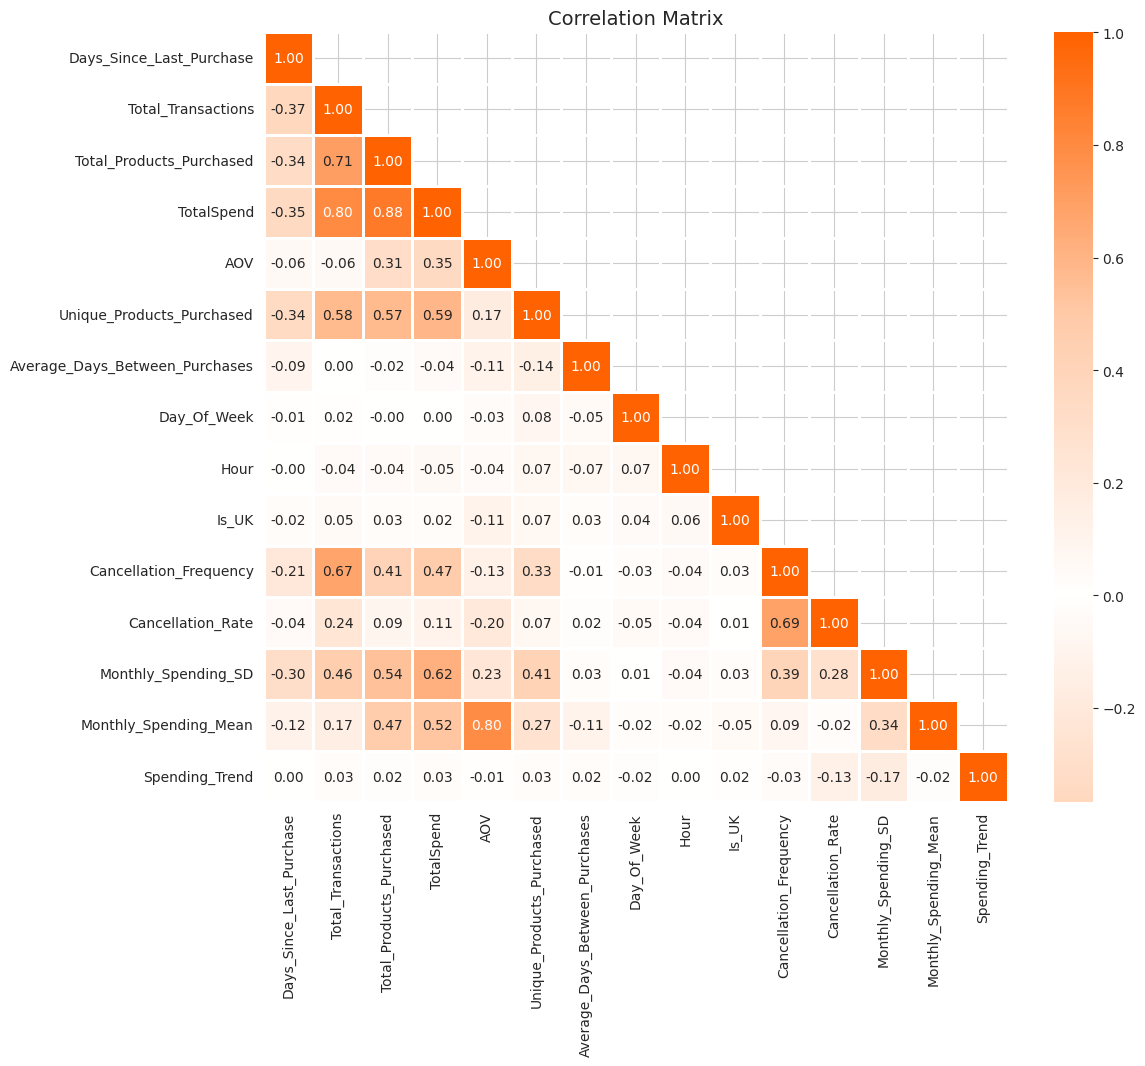

In [142]:
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors

### Reset background style
sns.set_style('whitegrid')

# Defining a custom colormap
colors = ['#ff6200', '#ffcaa8', 'white', '#ffcaa8', '#ff6200']
my_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)

# Creating a mask to only show the lower triangle of the matrix 
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap=my_cmap, annot=True, center=0, fmt='.2f', linewidths=2)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

### UK has the highest number of customers followed by Germany and France

In [ ]:
data_exp1=data_cleaned.groupby(['Country'])['InvoiceNo'].count()
data_exp1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sort invoices counts in descending order
data_exp1 = data_exp1.sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
data_exp1.plot(kind='bar')

# Customize the plot
plt.title('Invoices Count by Country')
plt.xlabel('Country', fontsize=10)
plt.ylabel('Number of Invoices', fontsize=10)
plt.xticks(rotation=90, fontsize=10)

plt.show()

In [ ]:
## Retrieving the customer counts

data_cleaned['CustomerID'].nunique()

In [ ]:
## Retrieving the invoice counts

data_cleaned['InvoiceNo'].nunique()

In [ ]:
data_cleaned